In [13]:
#import all libraries
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        

from tensorflow.keras.datasets import mnist     
from tensorflow.keras.models import Sequential  

from tensorflow.keras.layers import Dense, Dropout, Activation 
from tensorflow.keras.utils import to_categorical                                             

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # split the dataset into train and test

print("X_train shape", X_train.shape) # print the shape of the divided dataset
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
X_train = X_train.reshape(60000, 784)  # change the data from 28 x 28 matrix to a vector 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   # change the data type
X_test = X_test.astype('float32')

X_train /= 255 # normalize the data
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [14]:
classes = 10

Y_train = to_categorical(y_train, classes)
Y_test = to_categorical(y_test, classes)

In [15]:
model = Sequential()

In [16]:
model.add(Dense(512, input_shape =(784,)))

/home/himang/PROJECTS/Image_classification/.venv_new/lib64/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1735801529.174840    8071 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [17]:
model.add(Activation('relu'))

In [18]:
model.add(Dropout(0.2))

In [19]:
model.add(Dense(512))

In [20]:
model.add(Activation('relu'))

In [21]:
model.add(Dropout(0.2))

In [22]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model

model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics= ['accuracy'])

In [26]:
compiled_model = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1) 

Epoch 1/10


2025-01-02 12:40:56.496194: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8630 - loss: 0.4524
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9670 - loss: 0.1058
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9781 - loss: 0.0690
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9819 - loss: 0.0579
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9846 - loss: 0.0467
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9878 - loss: 0.0386
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9888 - loss: 0.0339
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9894 - loss: 0.0304
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9925 - loss: 0.0227
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9923 - loss: 0.0222


In [27]:
# evaluate the model 

acc =  model.evaluate(X_test, Y_test)
print('The accuracy of the test is ',acc[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9824 - loss: 0.0670
The accuracy of the test is  0.9854000210762024


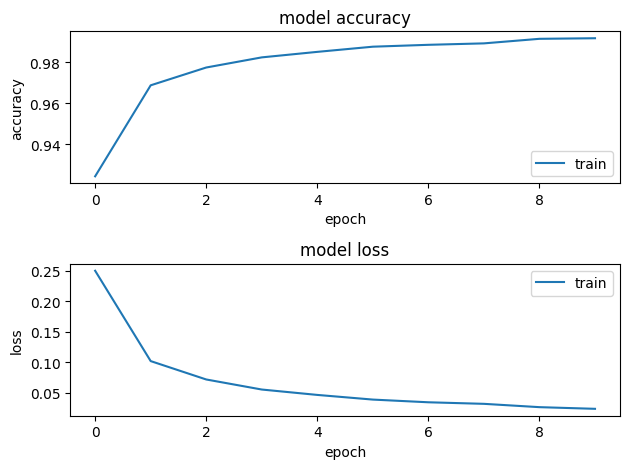

In [28]:
fig = plt.figure()  # we here are plotting the accuracy 
plt.subplot(2,1,1)
plt.plot(compiled_model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2) # we here are plotting the loss 
plt.plot(compiled_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [35]:
predictions = model.predict(X_test)
predicted_class = np.argmax(predictions, axis=1) # converting the class into labels to match the y_test

correct_indices = np.nonzero(predicted_class == y_test)[0]
incorrect_indices = np.nonzero(predicted_class != y_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


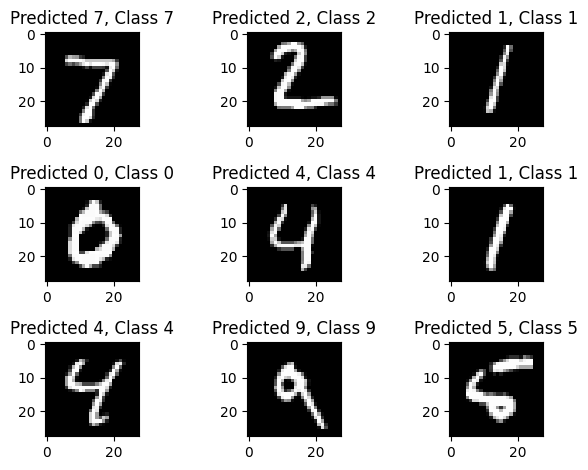

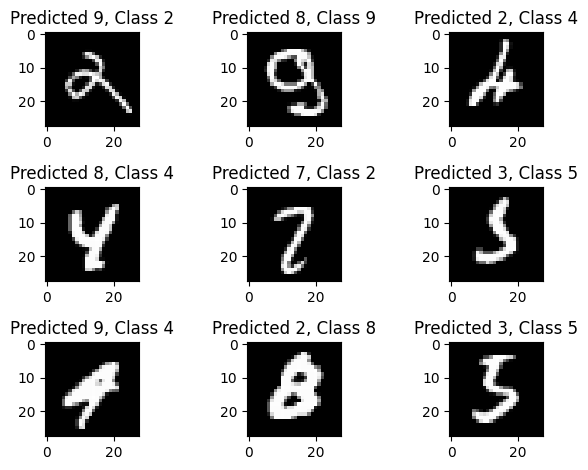

In [38]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_class[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_class[incorrect], y_test[incorrect]))
    
plt.tight_layout()